In [5]:
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import datetime

In [10]:
from webdriver_manager.chrome import ChromeDriverManager
driver = webdriver.Chrome(ChromeDriverManager().install())

Trying to download new driver from http://chromedriver.storage.googleapis.com/79.0.3945.36/chromedriver_win32.zip
Unpack archive C:\Users\Alisher\.wdm\drivers\chromedriver\79.0.3945.36\win32\chromedriver.zip


In [6]:
# Извлечение описания поста из ссылки Instagram
driver.get('https://www.instagram.com/p/B8wV9EXjTmr/')
soup = BeautifulSoup(driver.page_source,"lxml")
desc = " "
 
for item in soup.findAll('a'):
    desc= desc + " " + str(item.string)
 
    #Извлечение списка тегов из описания поста Instagram
taglist = desc.split()
taglist = [x for x in taglist if x.startswith('#')]
index = 0
while index < len(taglist):
    taglist[index] = taglist[index].strip('#')
    index += 1
 
    print(taglist)

NameError: name 'driver' is not defined

In [7]:
# Определение фрейма данных для хранения информации о хэштегах
tag_df  = pd.DataFrame(columns = ['Hashtag', 'NumberofPosts','Posting Freq (mins)'])
 
# Цикл над каждым хэштегом для извлечения информации
for tag in taglist:
     
    driver.get('https://www.instagram.com/explore/tags/'+str(tag))
    soup = BeautifulSoup(driver.page_source,"lxml")
     
    tagname = tag

    try:
        nposts = soup.find('span', {'class': 'g47SY'}).get_text()
    except AttributeError:
        print("ok")
         
    # Извлечение всех ссылок на публикации со страницы "исследовать теги" 
    # Необходимо извлечь частоту сообщений из последних сообщений
    myli = []
    for a in soup.find_all('a', href=True):
        myli.append(a['href'])
 

    newmyli = [x for x in myli if x.startswith('/p/')]
    del newmyli[:9]
    del newmyli[9:]
    del newmyli[1:8]
    
    timediff = []
 
    #Извлеките время публикации 1-го и 9-го самых последних сообщений для тега
    for j in range(len(newmyli)):
        driver.get('https://www.instagram.com'+str(newmyli[j]))
        soup = BeautifulSoup(driver.page_source,"lxml")
 
        for i in soup.findAll('time'):
            if i.has_attr('datetime'):
                timediff.append(i['datetime'])
                #print(timediff)
                
       # Вычислить разницу во времени между постами
        # Для получения частоты разноски
        datetimeFormat = '%Y-%m-%dT%H:%M:%S.%fZ'
        date1 = timediff[1]
        date2 = timediff[0]
        diff = datetime.datetime.strptime(date1, datetimeFormat)\
        - datetime.datetime.strptime(date2, datetimeFormat)
        pfreq= int(diff.total_seconds()/(9*60))

     
  
    tag_df.loc[len(tag_df)] = [tagname, nposts,pfreq]
    

print(tag_df)
 
# CSV output
tag_df.to_csv('hashtag_list.csv')

NameError: name 'taglist' is not defined

In [8]:
import pandas as pd
instatags = pd.read_csv('hashtag_list.csv')
instatags.head(25)

,Unnamed: 0,Hashtag,Number of Posts,Posting Freq (mins)
0,0,Tesla,3 011 350,0
1,1,cars,51 691 305,0
2,2,hardware,1 035 100,0
3,3,computer,4 249 514,0
4,4,Autopilot,143 313,0
5,5,FSD,360 506,0
6,6,TeslaFSD,50,2
7,7,FSDchip,50,2
8,8,technology,13 068 522,0
9,9,tech,10 548 414,0


In [9]:
instatags.columns
print(instatags[['Hashtag', 'Number of Posts']])

            Hashtag Number of Posts
0             Tesla       3 011 350
1              cars      51 691 305
2          hardware       1 035 100
3          computer       4 249 514
4         Autopilot         143 313
5               FSD         360 506
6          TeslaFSD              50
7           FSDchip              50
8        technology      13 068 522
9              tech      10 548 414
10             STEM       2 215 313
11          science      12 154 328
12             cars      51 691 315
13              car      66 110 169
14  carsofinstagram      15 367 034
15             auto      14 256 875
16       automotive       5 860 157
17        supercars      10 614 161
18         ElonMusk         957 242
19             Musk         228 788
20      TeslaModel3         264 942
21         research       3 445 851
22            Japan     123 742 349
23           future      17 291 088
24         futurism         390 799


Text(0.5,1,'Количество хэштегов за всё время')

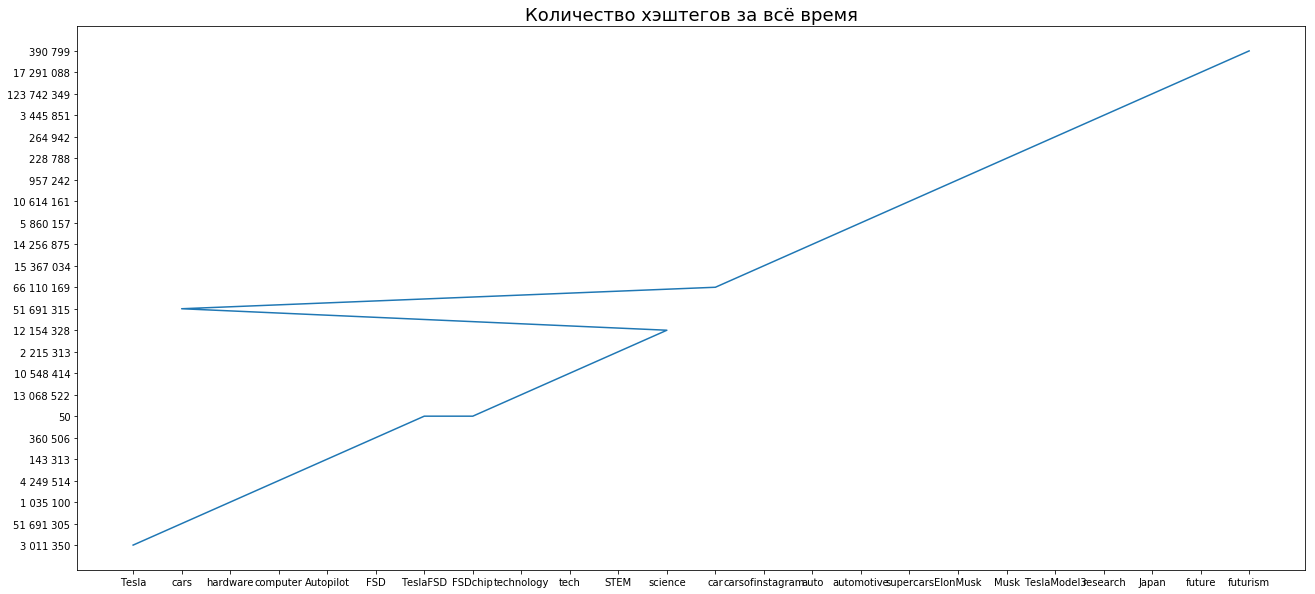

In [10]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1,1)
ax.plot(instatags['Hashtag'], instatags['Number of Posts'])
fig.set_size_inches(22,10)
plt.title('Количество хэштегов за всё время',fontsize=18)


TypeError: bad operand type for abs(): 'str'

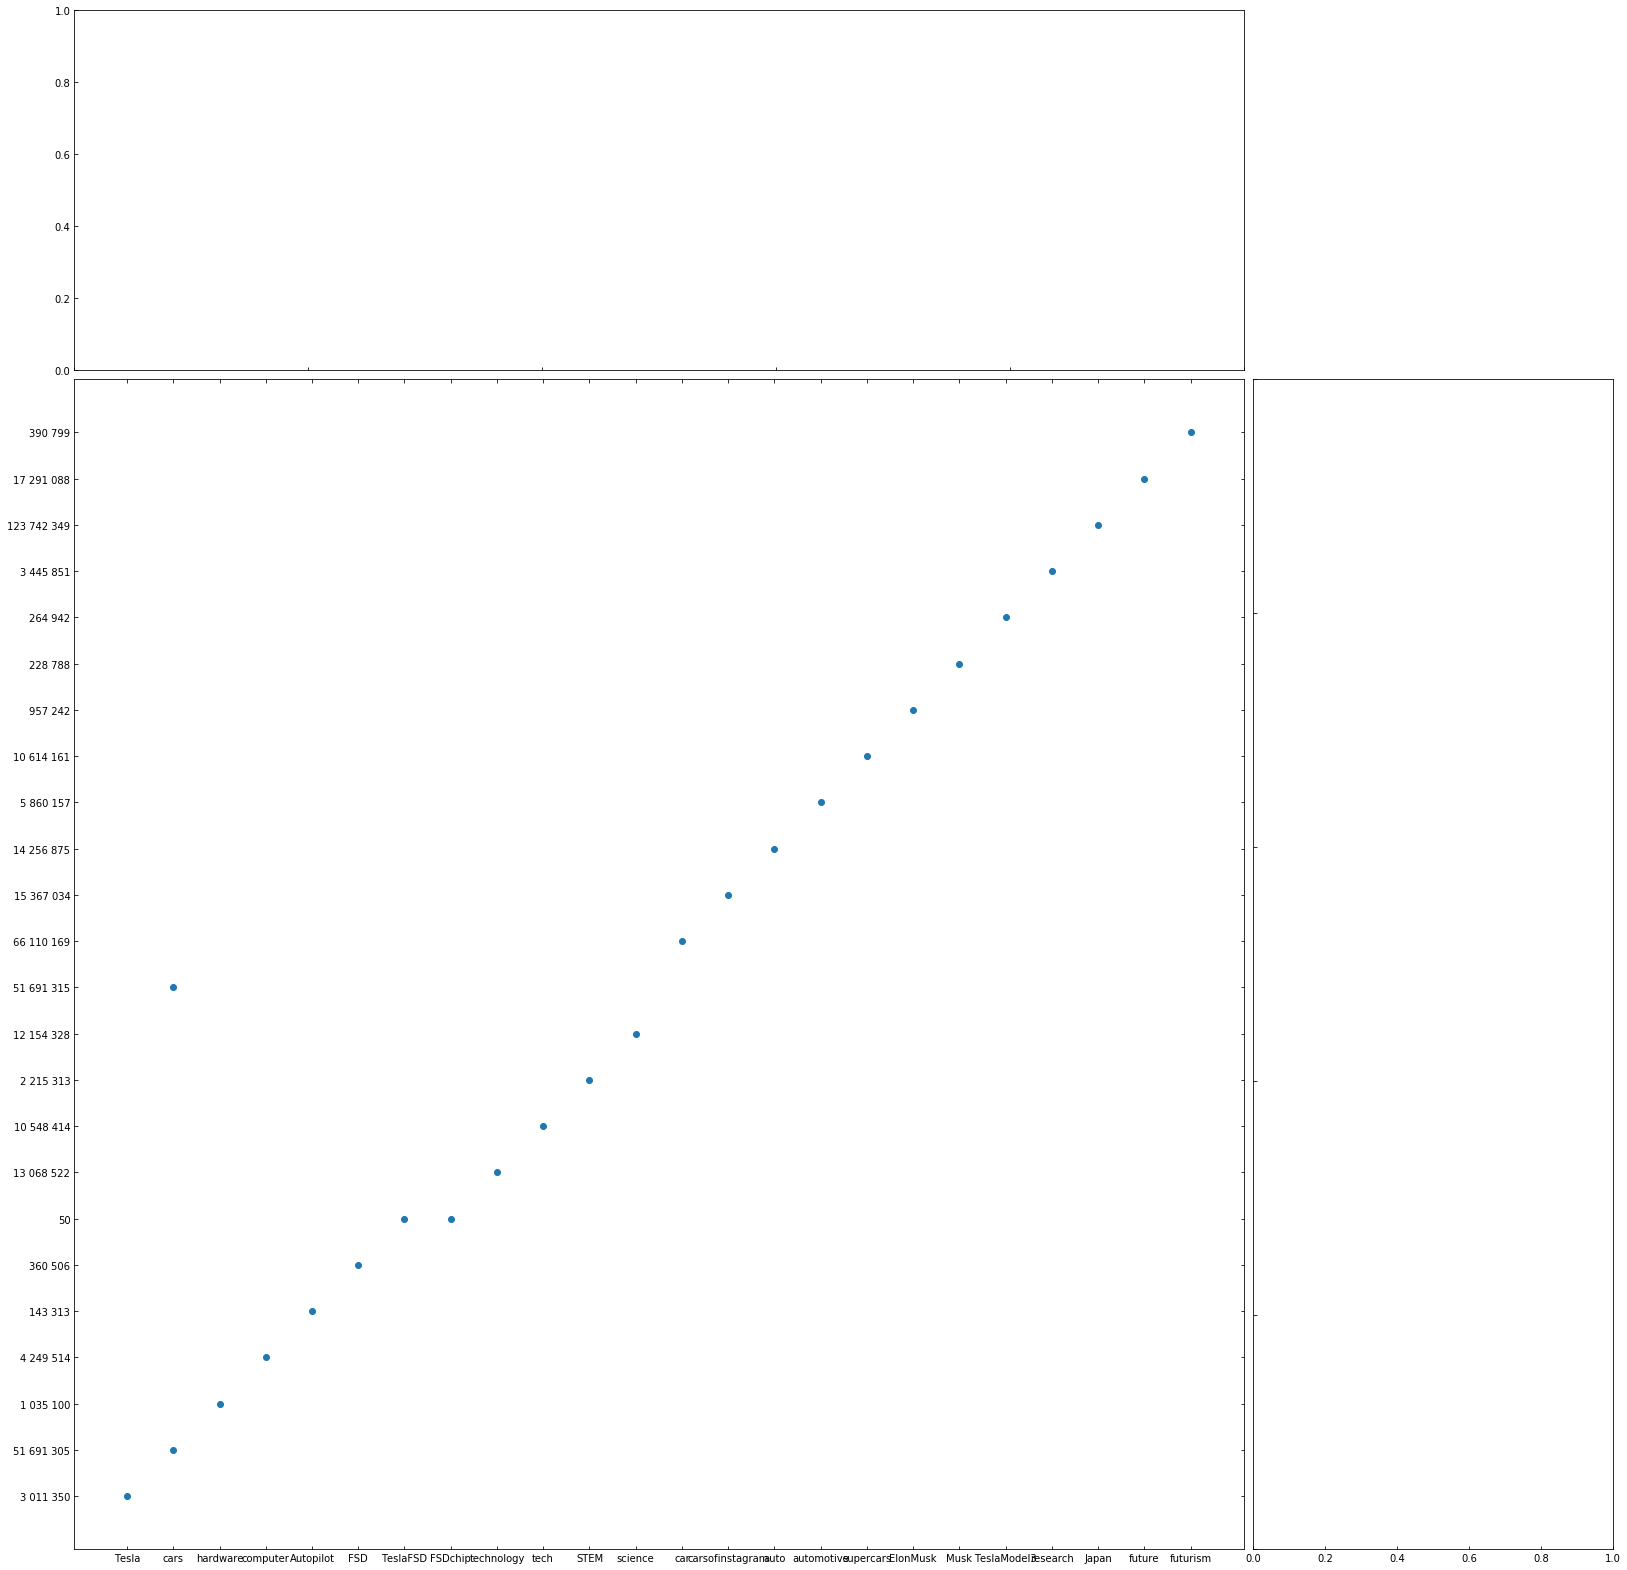

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# data
x = instatags['Hashtag'] 
y = instatags['Number of Posts']

# определения для осей
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# прямоугольная фигуры
plt.figure(figsize=(25, 25))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# plot:
ax_scatter.scatter(x, y)

binwidth = 0.25
lim = np.ceil(np.abs([x, y]).max() / binwidth) * binwidth
ax_scatter.set_xlim((-lim, lim))
ax_scatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
ax_histx.hist(x, bins=bins)
ax_histy.hist(y, bins=bins, orientation='horizontal')

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

plt.show()
